In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
X, y = make_classification(n_samples=30, n_features=2, n_classes=3, n_redundant=0, n_clusters_per_class=1)

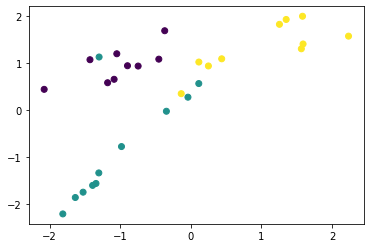

In [ ]:
plt.scatter(*zip(*X), c=y)

In [ ]:
X.shape, y.shape

((30, 2), (30,))

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
x1 = np.linspace(X[:, 0].min(), X[:, 0].max())
x2 = np.linspace(X[:, 1].min(), X[:, 1].max())
xx1, xx2 = np.meshgrid(x1, x2)
pred = lda.predict(np.c_[xx1.ravel(), xx2.ravel()])
pred = pred.reshape(xx1.shape)

In [ ]:
lda.coef_, lda.intercept_

(array([[-3.99089659,  3.18679394],
        [ 0.14131258, -2.16466832],
        [ 3.43636309, -0.48697939]]),
 array([-6.16761335, -1.34546464, -1.82163677]))

In [ ]:
lda.coef_[0]

array([-3.99089659,  3.18679394])

In [ ]:
from plotly import graph_objects as go

In [ ]:
def get_surfaces(lda, X, y):
  x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
  x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
  x1 = np.linspace(x1_min, x1_max, 30)
  x2 = np.linspace(x2_min, x2_max, 30)
  xx1, xx2 = np.meshgrid(x1, x2)
  x_test = np.c_[xx1.ravel(), xx2.ravel()]
  res1 = lda.coef_[0, 0]*x_test[:, 0] + lda.coef_[0, 1]*x_test[:, 1] + lda.intercept_[0]
  res1 = res1.reshape(xx1.shape)
  res2 = lda.coef_[1, 0]*x_test[:, 0] + lda.coef_[1, 1]*x_test[:, 1] + lda.intercept_[1]
  res2 = res2.reshape(xx1.shape)
  res3 = lda.coef_[2, 0]*x_test[:, 0] + lda.coef_[2, 1]*x_test[:, 1] + lda.intercept_[2]
  res3 = res3.reshape(xx1.shape)

  return xx1, xx2, res1, res2, res3, X, y

def plot_surfaces(xx1, xx2, res1, res2, res3, X, y):
  surface1 = go.Surface(x=xx1, y=xx2, z=res1, opacity=0.5)
  surface2 = go.Surface(x=xx1, y=xx2, z=res2, opacity=0.7)
  surface3 = go.Surface(x=xx1, y=xx2, z=res3)
  c = np.zeros(len(X))
  c[5] = 1
  scatter = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=y, mode="markers", marker=dict(color=c))

  fig = go.Figure(data=[surface1, surface2, surface3, scatter])
  fig.show()

Text(0.25380565206926997, 60.93452747515703, '-0.21; -3.47; -4.84')

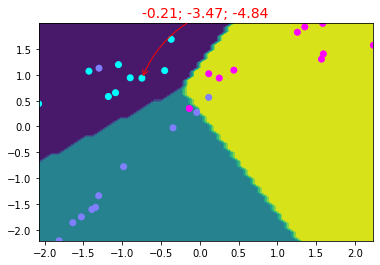

In [ ]:
plt.contourf(xx1, xx2, pred)
plt.scatter(*zip(*X), c=y, cmap="cool")
obs = 5
x_coord, y_coord = X[obs]
plt.annotate("{}; {}; {}".format(*np.round(lda.decision_function(X)[obs], 2)),
             xy=(x_coord, y_coord), xycoords='data',
             xytext=(x_coord+1, y_coord+60), c="r",
             textcoords='offset points', fontsize=14,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.2", color="r"))

In [ ]:
pd.DataFrame(lda.decision_function(X)).round(2).head(6)

,0,1,2
0,3.52,-2.59,-9.17
1,-4.73,0.20,-4.82
2,-4.83,-2.55,-1.71
3,0.38,-2.77,-6.15
4,-5.14,-1.94,-2.09
5,-0.21,-3.47,-4.84


In [ ]:
plot_surfaces(*get_surfaces(lda, X, y))

In [ ]:
value1 = lda.coef_[0, 0]*X[5, 0] + lda.coef_[0, 1]* X[5, 1] + lda.intercept_[0]
value2 = lda.coef_[1, 0]*X[5, 0] + lda.coef_[1, 1]* X[5, 1] + lda.intercept_[1]
value3 = lda.coef_[2, 0]*X[5, 0] + lda.coef_[2, 1]* X[5, 1] + lda.intercept_[2]
value1, value2, value3

(-0.21148237564380334, -3.473853316033879, -4.840927107811814)

In [ ]:
lda.decision_function(X)[5]

array([-0.21148238, -3.47385332, -4.84092711])

In [ ]:
from scipy.special import softmax

In [ ]:
lda.predict_proba(X)[5]

array([0.95414597, 0.0365414 , 0.00931263])

In [ ]:
softmax(lda.decision_function(X)[5])

array([0.95414597, 0.0365414 , 0.00931263])

--------------

In [ ]:
X_, y_ = make_classification(n_samples=30, n_features=2, n_classes=4, n_redundant=0, n_clusters_per_class=1)

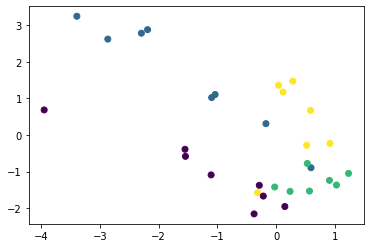

In [ ]:
plt.scatter(*zip(*X_), c=y_)

In [ ]:
lda_ = LinearDiscriminantAnalysis()
lda_.fit(X_, y_)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
lda_.coef_

array([[-2.95124966, -3.02503089],
       [ 0.34746711,  1.74987685],
       [ 0.54905782, -0.67822908],
       [ 2.42669367,  2.13554798]])

In [ ]:
lda_.intercept_

array([-5.39745808, -2.33934859, -1.94970812, -1.55606273])

In [ ]:
pd.DataFrame(lda_.decision_function(X_)).round(2)

,0,1,2,3
0,2.24,-6.25,-0.69,-7.08
1,1.18,-4.64,-1.82,-6.58
2,0.93,-3.90,-2.40,-6.55
3,-5.19,2.16,-6.01,-2.86
4,-7.03,1.73,-5.10,-1.19
5,-5.85,-3.75,-0.56,-0.82
6,-9.62,0.05,-2.85,1.44
7,-9.28,-0.25,-2.68,1.23
8,-5.24,-0.93,-3.25,-2.04
9,-2.43,-4.83,-0.60,-3.46
